In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./dataset/city_day.csv")

In [3]:
df.head(100)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ahmedabad,2015-04-06,120.96,NaN,4.23,20.86,25.02,NaN,4.23,35.54,35.66,6.05,15.85,1.68,303.0,Very Poor
96,Ahmedabad,2015-04-07,138.63,NaN,5.65,25.47,30.67,NaN,5.65,87.43,29.77,11.25,24.67,3.12,314.0,Very Poor
97,Ahmedabad,2015-04-08,144.36,NaN,15.82,30.69,46.10,NaN,15.82,66.39,27.34,17.22,49.56,7.71,378.0,Very Poor
98,Ahmedabad,2015-04-09,85.03,NaN,3.30,26.70,27.41,NaN,3.30,59.16,35.89,7.58,29.19,4.08,415.0,Severe


In [4]:
df.shape

(29531, 16)

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [8]:
mis_val = df.isnull().sum()
        
# Percentage of missing values
mis_val_percent = 100 * df.isnull().sum() / len(df)

# Make a table with the results
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% of Total Values'})

# Sort the table by percentage of missing descending
mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
'% of Total Values', ascending=False).round(1)

In [9]:
mis_val_table_ren_columns

,Missing Values,% of Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


Lot of data missing in certain columns, so we need to impute. Handling missing values in subsequent cells using Linear Interpolation

In [10]:
df.interpolate(limit_direction='both', inplace=True)

In [11]:
df.head(100)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,NaN
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,NaN
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,NaN
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,NaN
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ahmedabad,2015-04-06,120.96,141.54,4.23,20.86,25.02,26.64,4.23,35.54,35.66,6.05,15.85,1.68,303.0,Very Poor
96,Ahmedabad,2015-04-07,138.63,141.54,5.65,25.47,30.67,26.64,5.65,87.43,29.77,11.25,24.67,3.12,314.0,Very Poor
97,Ahmedabad,2015-04-08,144.36,141.54,15.82,30.69,46.10,26.64,15.82,66.39,27.34,17.22,49.56,7.71,378.0,Very Poor
98,Ahmedabad,2015-04-09,85.03,141.54,3.30,26.70,27.41,26.64,3.30,59.16,35.89,7.58,29.19,4.08,415.0,Severe


In [12]:
df['Vehicular Pollution'] = df['PM2.5'] + df['PM10'] + df['NO'] + df['NO2'] + df['NOx'] + df['NH3'] + df['CO']
df['Industrial Pollution'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']

In [13]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,NaN,278.63,161.02
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,NaN,275.51,71.56
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,NaN,325.22,85.22
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,NaN,281.27,70.24
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,NaN,344.80,107.32


In [14]:
for ind in df.index:

    if (df['AQI'][ind] >= 0 and df['AQI'][ind] <= 50):
        df['AQI_Bucket'][ind] = 'Good'
    elif (df['AQI'][ind] >= 51 and df['AQI'][ind] <= 100):
        df['AQI_Bucket'][ind] = 'Satisfactory'
    elif (df['AQI'][ind] >= 101 and df['AQI'][ind] <= 200):
        df['AQI_Bucket'][ind] = 'Moderate'
    elif (df['AQI'][ind] >= 201 and df['AQI'][ind] <= 300):
        df['AQI_Bucket'][ind] = 'Poor'
    elif (df['AQI'][ind] >= 301 and df['AQI'][ind] <= 400):
        df['AQI_Bucket'][ind] = 'Very Poor'
    else:
        df['AQI_Bucket'][ind] = 'Severe'
    

C:\Users\techi\AppData\Local\Temp\ipykernel_20320\666924950.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'][ind] = 'Poor'
C:\Users\techi\AppData\Local\Temp\ipykernel_20320\666924950.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'][ind] = 'Very Poor'
C:\Users\techi\AppData\Local\Temp\ipykernel_20320\666924950.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_Bucket'][ind] = 'Severe'


In [15]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,278.63,161.02
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,275.51,71.56
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,325.22,85.22
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,281.27,70.24
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,344.80,107.32


In [16]:
df.isnull().sum()

City                    0
Date                    0
PM2.5                   0
PM10                    0
NO                      0
NO2                     0
NOx                     0
NH3                     0
CO                      0
SO2                     0
O3                      0
Benzene                 0
Toluene                 0
Xylene                  0
AQI                     0
AQI_Bucket              0
Vehicular Pollution     0
Industrial Pollution    0
dtype: int64

Feature Engineering:

We have already created Vehicular and Industrial pollution features. We will further create Organic, Inorganic, and Particulate Matter as features by combining already existing columns


In [17]:
df['Organic Pollutants'] = df['Benzene'] + df['Toluene'] + df['Xylene']
df['Inorganic Pollutants'] = df['CO'] + df['NH3'] + df['NO'] + df['NO2'] + df['NOx'] + df['SO2']+df['O3']
df['Particulate Matter'] = df['PM2.5'] + df['PM10']
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,Particulate Matter
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,...,0.00,0.02,0.00,209.0,Poor,278.63,161.02,0.02,224.85,214.78
1,Ahmedabad,2015-01-02,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,...,3.68,5.50,3.77,209.0,Poor,275.51,71.56,12.95,119.34,214.78
2,Ahmedabad,2015-01-03,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,...,6.80,16.40,2.25,209.0,Poor,325.22,85.22,25.45,170.21,214.78
3,Ahmedabad,2015-01-04,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,...,4.43,10.14,1.00,209.0,Poor,281.27,70.24,15.57,121.16,214.78
4,Ahmedabad,2015-01-05,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,...,7.01,18.89,2.78,209.0,Poor,344.80,107.32,28.68,208.66,214.78


Some visualization to get an idea of the most commonly observed AQI values for the cities in the dataset follows

In [18]:
city_median_AQI = df[['City', 'AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()
city_median_AQI

,City,AQI
0,Aizawl,23.000000
1,Shillong,49.000000
2,Thiruvananthapuram,67.000000
3,Mumbai,74.832379
4,Coimbatore,75.136364
5,Amaravati,78.000000
6,Chandigarh,82.000000
7,Bengaluru,86.000000
8,Kolkata,94.000000
9,Ernakulam,95.000000


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

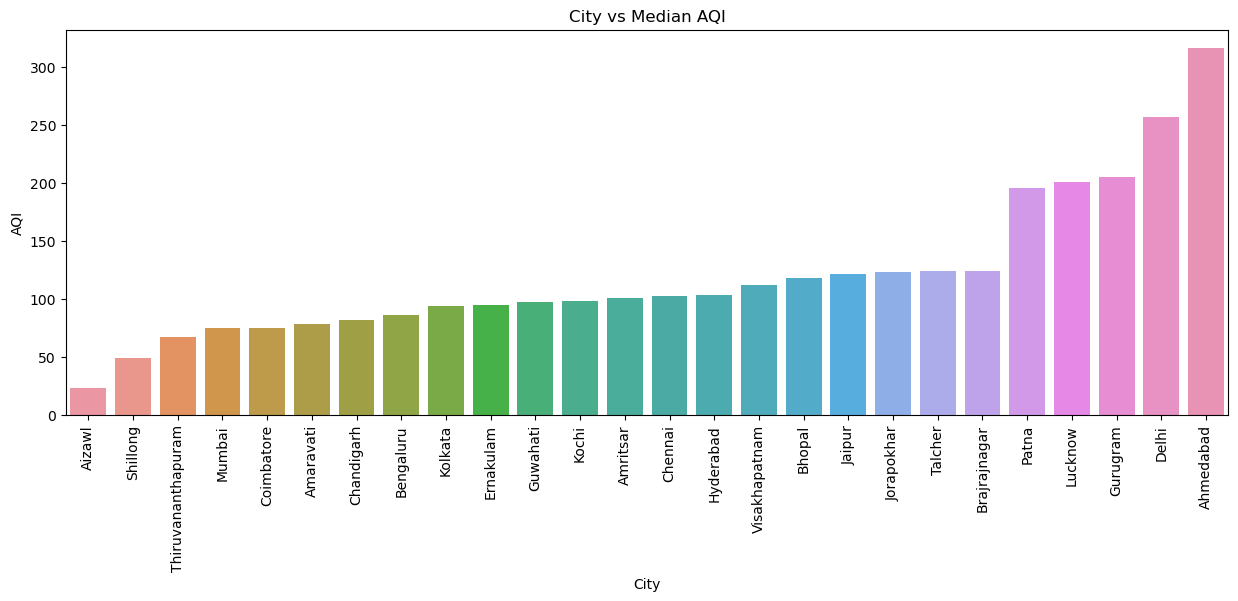

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='City', y='AQI', data=city_median_AQI).set(title='City vs Median AQI')
plt.xticks(rotation=90)
plt.show()

In [21]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [22]:
city_median_AQI_per_year = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()

In [23]:
city_median_AQI_per_year

,City,year,AQI
0,Aizawl,2020,23.000000
1,Shillong,2019,44.000000
2,Shillong,2020,49.883721
3,Amaravati,2020,54.000000
4,Talcher,2017,60.578431
...,...,...,...
98,Delhi,2015,303.000000
99,Ahmedabad,2016,306.098712
100,Gurugram,2017,314.000000
101,Ahmedabad,2019,455.000000


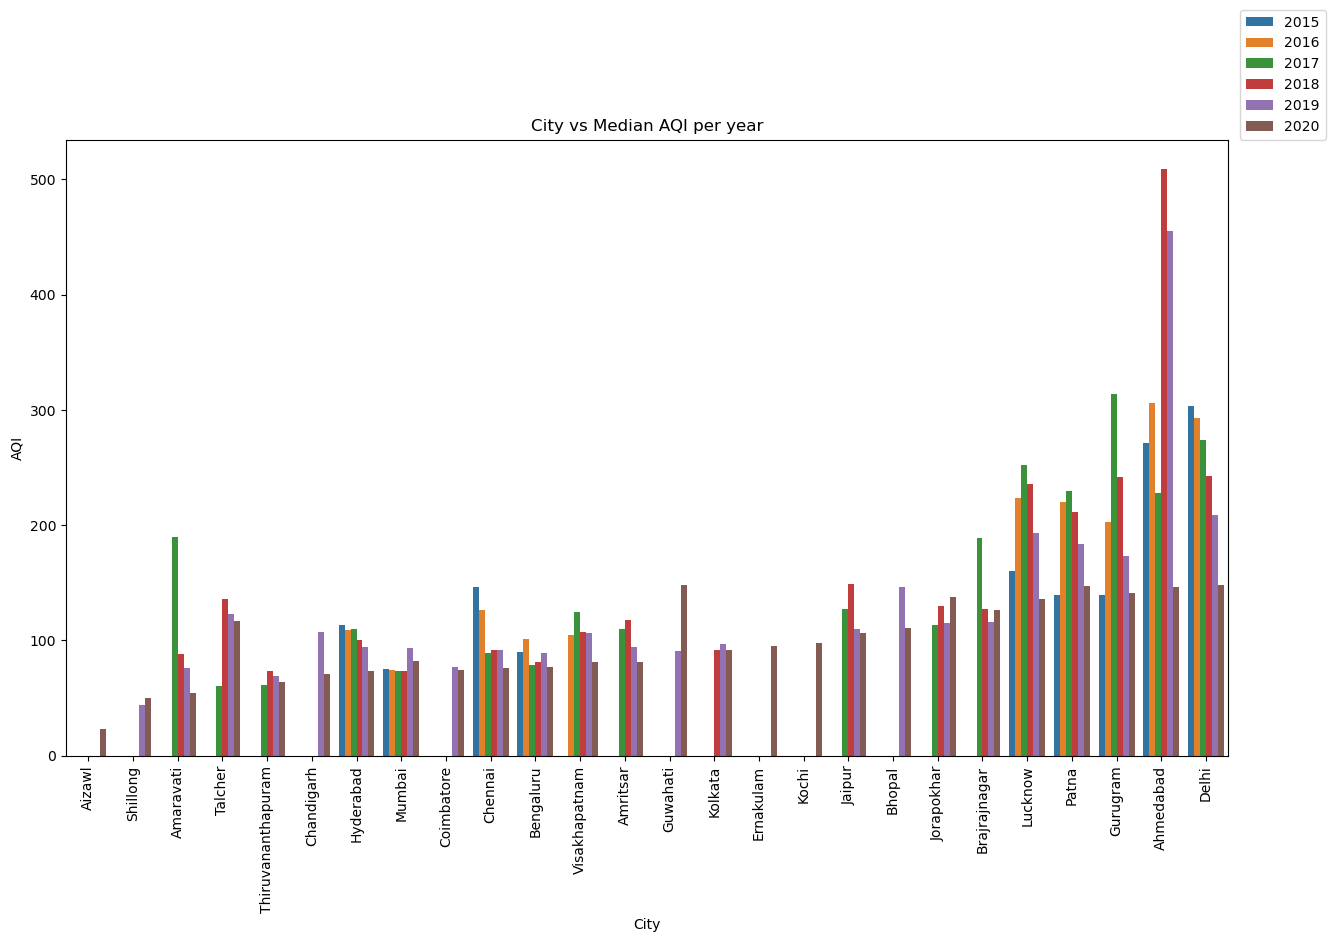

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='City', y='AQI', data=city_median_AQI_per_year,hue='year').set(title ='City vs Median AQI per year')
plt.xticks(rotation=90)
plt.legend(loc=(1.01, 1))
plt.show()

In [25]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,Particulate Matter,year,month
0,Ahmedabad,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,...,0.00,209.0,Poor,278.63,161.02,0.02,224.85,214.78,2015,1
1,Ahmedabad,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,...,3.77,209.0,Poor,275.51,71.56,12.95,119.34,214.78,2015,1
2,Ahmedabad,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,...,2.25,209.0,Poor,325.22,85.22,25.45,170.21,214.78,2015,1
3,Ahmedabad,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,...,1.00,209.0,Poor,281.27,70.24,15.57,121.16,214.78,2015,1
4,Ahmedabad,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,...,2.78,209.0,Poor,344.80,107.32,28.68,208.66,214.78,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,...,0.73,41.0,Good,131.18,46.89,15.04,97.07,65.96,2020,6
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,...,0.38,70.0,Satisfactory,156.99,46.19,3.33,101.38,98.47,2020,6
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,...,0.00,68.0,Satisfactory,151.14,39.40,0.02,101.88,88.64,2020,6
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,...,0.00,54.0,Satisfactory,129.27,38.14,0.00,100.80,66.61,2020,6


In [26]:
from sklearn.preprocessing import LabelEncoder
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df['City']=le.fit_transform(df['City'].astype(str))
final_df = df.drop(['AQI_Bucket'], axis=1)
final_df.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  29531 non-null  int32  
 1   PM2.5                 29531 non-null  float64
 2   PM10                  29531 non-null  float64
 3   NO                    29531 non-null  float64
 4   NO2                   29531 non-null  float64
 5   NOx                   29531 non-null  float64
 6   NH3                   29531 non-null  float64
 7   CO                    29531 non-null  float64
 8   SO2                   29531 non-null  float64
 9   O3                    29531 non-null  float64
 10  Benzene               29531 non-null  float64
 11  Toluene               29531 non-null  float64
 12  Xylene                29531 non-null  float64
 13  AQI                   29531 non-null  float64
 14  Vehicular Pollution   29

In [27]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Xylene,AQI,AQI_Bucket,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,Particulate Matter,year,month
0,0,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,...,0.00,209.0,Poor,278.63,161.02,0.02,224.85,214.78,2015,1
1,0,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,...,3.77,209.0,Poor,275.51,71.56,12.95,119.34,214.78,2015,1
2,0,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,...,2.25,209.0,Poor,325.22,85.22,25.45,170.21,214.78,2015,1
3,0,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,...,1.00,209.0,Poor,281.27,70.24,15.57,121.16,214.78,2015,1
4,0,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,...,2.78,209.0,Poor,344.80,107.32,28.68,208.66,214.78,2015,1


In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  29531 non-null  int32  
 1   PM2.5                 29531 non-null  float64
 2   PM10                  29531 non-null  float64
 3   NO                    29531 non-null  float64
 4   NO2                   29531 non-null  float64
 5   NOx                   29531 non-null  float64
 6   NH3                   29531 non-null  float64
 7   CO                    29531 non-null  float64
 8   SO2                   29531 non-null  float64
 9   O3                    29531 non-null  float64
 10  Benzene               29531 non-null  float64
 11  Toluene               29531 non-null  float64
 12  Xylene                29531 non-null  float64
 13  AQI                   29531 non-null  float64
 14  Vehicular Pollution   29531 non-null  float64
 15  Industrial Pollutio

In [29]:
X_train = final_df.loc[final_df['year'] <= 2018][['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Vehicular Pollution', 'Industrial Pollution', 'Organic Pollutants', 'Inorganic Pollutants', 'year', 'month']]
X_train.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,year,month
0,0,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,278.63,161.02,0.02,224.85,2015,1
1,0,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,275.51,71.56,12.95,119.34,2015,1
2,0,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,325.22,85.22,25.45,170.21,2015,1
3,0,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,281.27,70.24,15.57,121.16,2015,1
4,0,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,344.80,107.32,28.68,208.66,2015,1


In [30]:
y_train = final_df.loc[final_df['year'] <= 2018].AQI
y_train.head()

0    209.0
1    209.0
2    209.0
3    209.0
4    209.0
Name: AQI, dtype: float64

In [31]:
print(X_train.shape)
print(y_train.shape)

(17439, 19)
(17439,)


In [32]:
X_test = final_df.loc[final_df['year'] > 2018][['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Vehicular Pollution', 'Industrial Pollution', 'Organic Pollutants', 'Inorganic Pollutants', 'year', 'month']]
X_test.reset_index(drop=True, inplace=True)   
X_test

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,year,month
0,0,110.71,141.54,63.03,111.56,100.04,26.64,63.03,80.15,57.12,4.08,32.33,6.93,616.55,180.61,43.34,501.57,2019,1
1,0,147.57,141.54,59.56,107.46,129.87,26.64,59.56,47.70,48.23,4.10,32.34,6.99,672.20,139.36,43.43,479.02,2019,1
2,0,131.50,141.54,119.68,75.82,88.04,26.64,119.68,55.29,43.25,4.09,32.42,7.00,702.90,142.05,43.51,528.40,2019,1
3,0,102.12,141.54,57.92,95.29,54.93,26.64,57.92,69.02,51.71,4.09,32.38,6.98,536.36,164.18,43.45,413.43,2019,1
4,0,115.00,141.54,63.86,111.04,61.99,26.64,63.86,86.65,59.25,4.12,32.43,6.97,583.93,189.42,43.52,473.29,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12087,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,131.18,46.89,15.04,97.07,2020,6
12088,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,156.99,46.19,3.33,101.38,2020,6
12089,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,151.14,39.40,0.02,101.88,2020,6
12090,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,129.27,38.14,0.00,100.80,2020,6


In [33]:
y_test = final_df.loc[final_df['year'] > 2018].reset_index(drop=True).AQI

y_test

0        1474.0
1        1246.0
2        1719.0
3        1264.0
4        1127.0
          ...  
12087      41.0
12088      70.0
12089      68.0
12090      54.0
12091      50.0
Name: AQI, Length: 12092, dtype: float64

In [34]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=500, learning_rate=0.05, n_jobs=10)
model.fit(X_train, y_train)


c:\Users\techi\anaconda3\envs\ml\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
c:\Users\techi\anaconda3\envs\ml\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [35]:
score = model.score(X_train, y_train)
print(score)

0.9778494297545366


In [36]:
y_preds = model.predict(X_test)
y_preds.shape

(12092,)

In [37]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_preds, squared=False)
print(rmse)


46.49274973537498


In [38]:
X_test['AQI_predicted'] = np.nan
X_test['AQI'] = np.nan
for ind in X_test.index:
    X_test['AQI_predicted'][ind] = y_preds[ind]
    X_test['AQI'][ind] = y_test[ind]

C:\Users\techi\AppData\Local\Temp\ipykernel_20320\426775689.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AQI_predicted'][ind] = y_preds[ind]
C:\Users\techi\AppData\Local\Temp\ipykernel_20320\426775689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['AQI'][ind] = y_test[ind]


In [39]:
X_test.head(200)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,Toluene,Xylene,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,year,month,AQI_predicted,AQI
0,0,110.71,141.54,63.03,111.56,100.04,26.64,63.03,80.15,57.12,...,32.33,6.93,616.55,180.61,43.34,501.57,2019,1,1186.507690,1474.0
1,0,147.57,141.54,59.56,107.46,129.87,26.64,59.56,47.70,48.23,...,32.34,6.99,672.20,139.36,43.43,479.02,2019,1,1009.924927,1246.0
2,0,131.50,141.54,119.68,75.82,88.04,26.64,119.68,55.29,43.25,...,32.42,7.00,702.90,142.05,43.51,528.40,2019,1,1558.571655,1719.0
3,0,102.12,141.54,57.92,95.29,54.93,26.64,57.92,69.02,51.71,...,32.38,6.98,536.36,164.18,43.45,413.43,2019,1,1078.675049,1264.0
4,0,115.00,141.54,63.86,111.04,61.99,26.64,63.86,86.65,59.25,...,32.43,6.97,583.93,189.42,43.52,473.29,2019,1,946.966309,1127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,42.43,116.70,32.10,114.44,92.42,26.64,32.10,142.27,38.20,...,80.04,1.48,456.83,268.29,87.82,478.17,2019,7,558.267273,455.0
196,0,38.99,114.94,31.97,103.79,87.09,26.64,31.97,156.48,32.57,...,80.04,1.48,435.39,276.87,87.82,470.51,2019,7,559.851257,488.0
197,0,34.92,114.11,30.50,110.39,88.63,26.64,30.50,116.97,37.07,...,80.04,1.48,435.69,241.86,87.82,440.70,2019,7,600.163086,513.0
198,0,32.70,105.78,26.00,103.72,80.25,26.64,26.00,132.41,45.92,...,80.04,1.48,401.09,266.15,87.82,440.94,2019,7,542.183105,466.0


In [40]:
city_median_AQI_per_year_test = X_test[['City','AQI','year']].groupby(['City','year']).median().reset_index()

In [41]:
city_median_AQI_per_year_test['City']=le.inverse_transform(city_median_AQI_per_year_test['City'])
city_median_AQI_per_year_test

,City,year,AQI
0,Ahmedabad,2019,455.000000
1,Ahmedabad,2020,146.000000
2,Aizawl,2020,23.000000
3,Amaravati,2019,76.000000
4,Amaravati,2020,54.000000
5,Amritsar,2019,94.000000
6,Amritsar,2020,81.000000
7,Bengaluru,2019,89.000000
8,Bengaluru,2020,77.000000
9,Bhopal,2019,146.500000


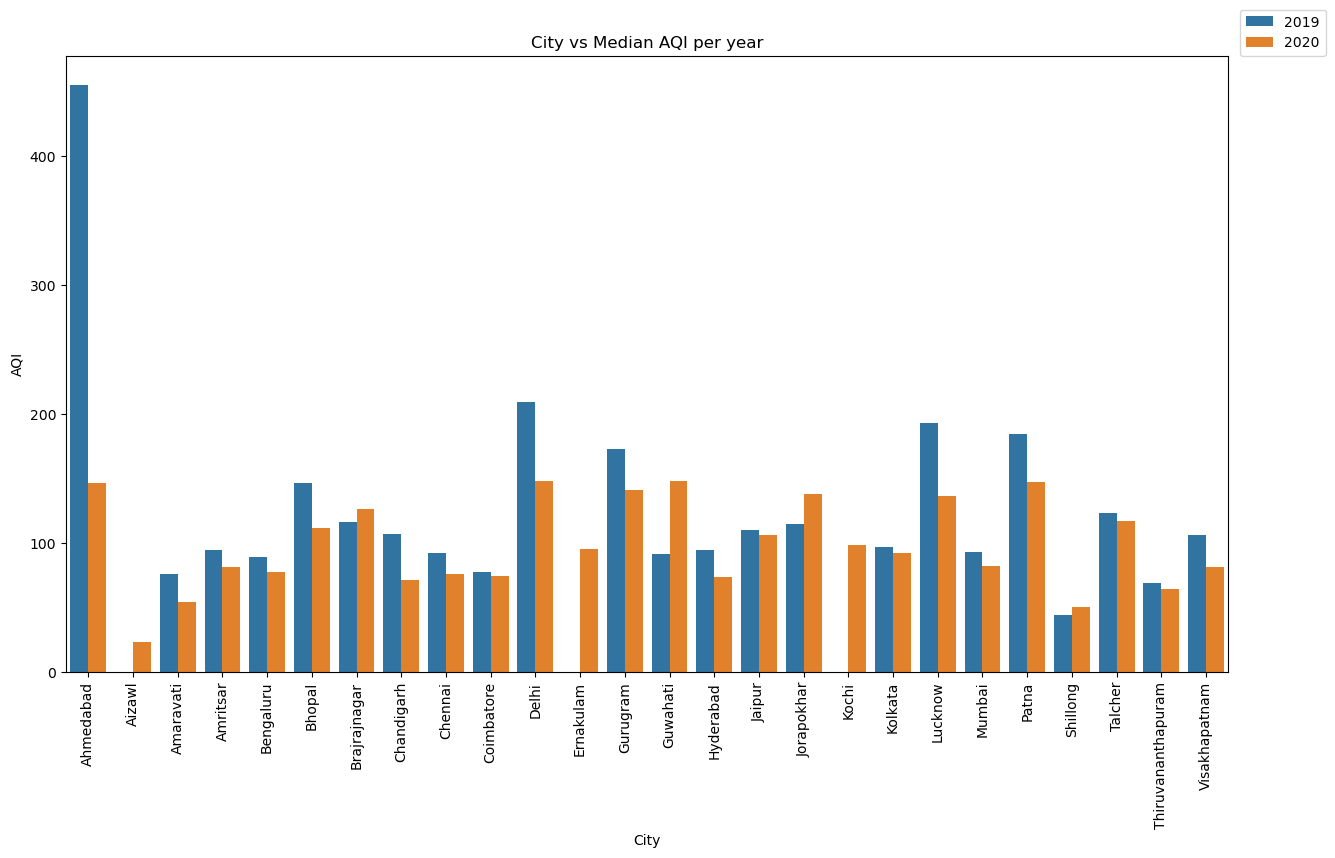

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(x='City', y='AQI', data=city_median_AQI_per_year_test,hue='year').set(title ='City vs Median AQI per year')
plt.xticks(rotation=90)
plt.legend(loc=(1.01, 1))
plt.show()

In [43]:
city_median_AQI_per_year_pred = X_test[['City','AQI_predicted','year']].groupby(['City','year']).median().reset_index()

city_median_AQI_per_year_pred['City']=le.inverse_transform(city_median_AQI_per_year_pred['City'])
city_median_AQI_per_year_pred

,City,year,AQI_predicted
0,Ahmedabad,2019,497.356934
1,Ahmedabad,2020,181.523926
2,Aizawl,2020,56.157894
3,Amaravati,2019,74.475441
4,Amaravati,2020,68.160255
5,Amritsar,2019,96.089272
6,Amritsar,2020,90.253029
7,Bengaluru,2019,88.249664
8,Bengaluru,2020,77.836243
9,Bhopal,2019,158.006180


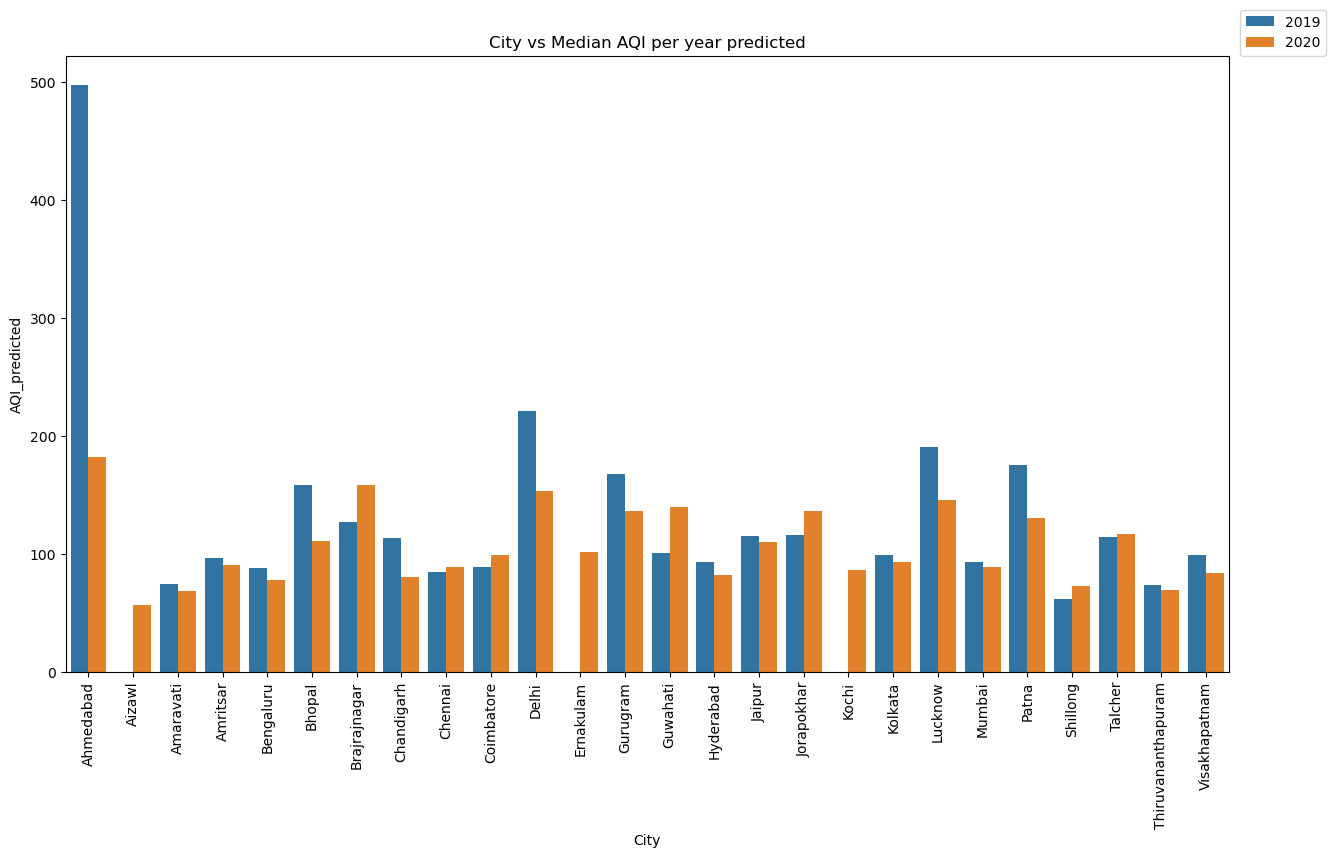

In [44]:
plt.figure(figsize=(15,8))
sns.barplot(x='City', y='AQI_predicted', data=city_median_AQI_per_year_pred,hue='year').set(title ='City vs Median AQI per year predicted')
plt.xticks(rotation=90)
plt.legend(loc=(1.01, 1))
plt.show()

In [45]:
X_final = final_df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Vehicular Pollution', 'Industrial Pollution', 'Organic Pollutants', 'Inorganic Pollutants', 'year', 'month']]
X_final

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,Vehicular Pollution,Industrial Pollution,Organic Pollutants,Inorganic Pollutants,year,month
0,0,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,278.63,161.02,0.02,224.85,2015,1
1,0,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,275.51,71.56,12.95,119.34,2015,1
2,0,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,325.22,85.22,25.45,170.21,2015,1
3,0,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,281.27,70.24,15.57,121.16,2015,1
4,0,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,344.80,107.32,28.68,208.66,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,131.18,46.89,15.04,97.07,2020,6
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,156.99,46.19,3.33,101.38,2020,6
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,151.14,39.40,0.02,101.88,2020,6
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,129.27,38.14,0.00,100.80,2020,6


In [46]:
y_final = final_df.AQI
y_final

0        209.0
1        209.0
2        209.0
3        209.0
4        209.0
         ...  
29526     41.0
29527     70.0
29528     68.0
29529     54.0
29530     50.0
Name: AQI, Length: 29531, dtype: float64

Finally fitting model to whole data

In [47]:
model.fit(X_final, y_final)

c:\Users\techi\anaconda3\envs\ml\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=10,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
import pickle
file_name = "xgb_model.pkl"

# save
pickle.dump(model, open(file_name, "wb"))